# Example of using the ClearskyCalculator class

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
from solar_utils.clearsky_calculator import ClearskyCalculator

In [2]:
# Initialize the instance by defining latitude and longitude
lat = 9.3
long = 110.833
site1_obj = ClearskyCalculator(lat, long)

# Define the data range to calculate clear-sky information

start_date = '2023-01-01'
end_date = '2023-01-02'
freq = '15min'
choice = 'estimate'
solar_info_df = site1_obj.get_solar_info(start_date, end_date, freq, choice=choice)
solar_info_df.between_time("07:00", "17:00")

,zna,AM,Iclr
Datetime,,,
2023-01-01 07:00:00,75.758579,4.005304,227.288140
2023-01-01 07:15:00,72.470557,3.288825,291.523692
2023-01-01 07:30:00,69.217400,2.800008,354.500181
2023-01-01 07:45:00,66.004800,2.447456,415.694882
2023-01-01 08:00:00,62.839474,2.182828,474.711283
2023-01-01 08:15:00,59.729401,1.978247,531.218879
2023-01-01 08:30:00,56.684104,1.816551,584.927642
2023-01-01 08:45:00,53.715003,1.686618,635.576310
2023-01-01 09:00:00,50.835825,1.580946,682.926787


<Axes: xlabel='Datetime'>

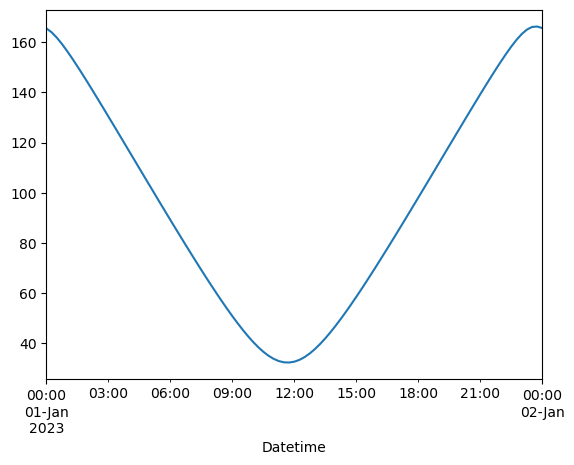

In [3]:
# explore some variable
solar_info_df['zna'].plot()

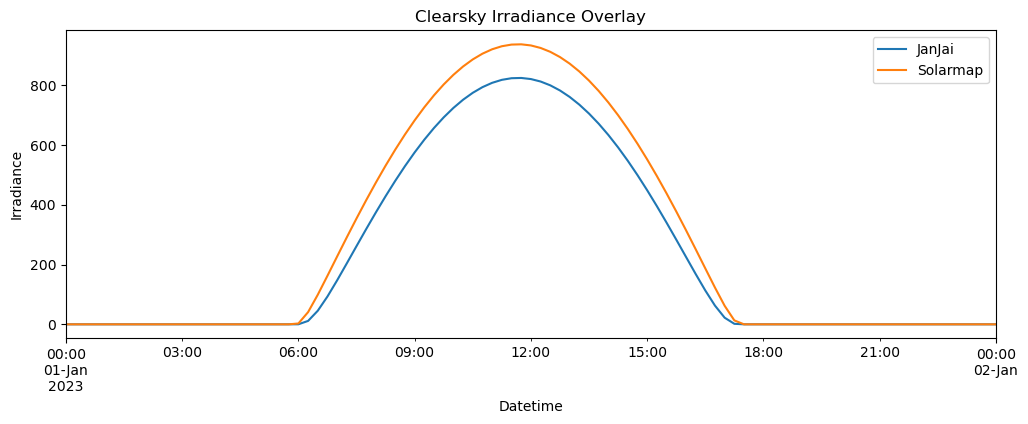

In [5]:
# Compare clear-sky irradiance that calculated from different TL 

import matplotlib.pyplot as plt
jj_iclr_df = site1_obj.cal_clearsky_irradiance(start_date=start_date, end_date=end_date, choice='JanJai', freq='15min')
solarmap_iclr_df = site1_obj.cal_clearsky_irradiance(start_date=start_date, end_date=end_date, choice='estimate', freq='15min')


# Create a single graph and plot both datasets on it

fig, ax = plt.subplots(figsize=(12, 4))

jj_iclr_df['Iclr'].plot(ax=ax, title='Clearsky Irradiance Overlay', label='JanJai')
solarmap_iclr_df['Iclr'].plot(ax=ax, label='Solarmap')

# Customize the graph as needed

ax.set_xlabel('Datetime')
ax.set_ylabel('Irradiance')
ax.legend(loc='upper right')

plt.show()